## Observations and Insights 

•	The split of gender of the mice used in the study was about 50% male and 50% female

•	There is one mouse treated with Infubinol who’s final tumor volume proves to be an outlier in the data

•	The size of the tumors for mice treated with Capomulin declined over time

•	There is a positive correlation between the weights of the mice and the size of their tumors


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pharma_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
Pharma_df.head()


# Display the data table for preview
Pharma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(Pharma_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice = Pharma_df[Pharma_df.duplicated(["Mouse ID", "Timepoint"])]
print(Duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Pharma_Clean = Pharma_df[Pharma_df["Mouse ID"]!= "g989"]
Pharma_Clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(Pharma_Clean["Mouse ID"].unique())
mouse_count2

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_mean1 = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Tumor_mean1

Tumor_median1 = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Tumor_median1

Tumor_var1 = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Tumor_var1

Tumor_std1 = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Tumor_std1

Tumor_sem1 = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
Tumor_sem1

Df_list1 = [Tumor_mean1, Tumor_median1, Tumor_var1, Tumor_std1, Tumor_sem1]

Tumor_Summary1 = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), Df_list1)
Tumor_Summary1


,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Tumor_mean = Pharma_Clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean']})
Tumor_mean

Tumor_Median = Pharma_Clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['median']})
Tumor_Median

Tumor_Variance = Pharma_Clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['var']})
Tumor_Variance

Tumor_Std = Pharma_Clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['std']})
Tumor_Std

Tumor_Sem = Pharma_Clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['sem']})
Tumor_Sem

Df_list = [Tumor_mean, Tumor_Median, Tumor_Variance, Tumor_Std, Tumor_Sem]

Tumor_Summary = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), Df_list)
Tumor_Summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Volume Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Volume (Mmm3)'>

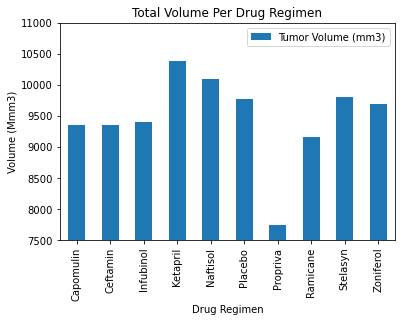

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Measurement_total = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sum()
Measurement_total

Regime_Totals = Measurement_total.plot.bar()
Regime_Totals.legend(loc="best")
plt.title("Total Volume Per Drug Regimen")
plt.ylabel("Volume (Mmm3)")
plt.ylim(7500, 11000)
Regime_Totals

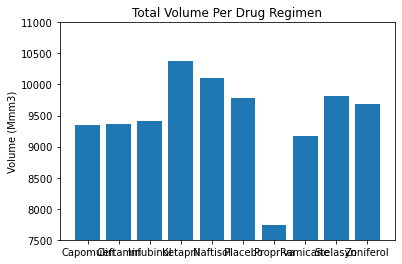

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
fig, ax = plt.subplots()

Regimes = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol" ]
Tumor_Sum = Pharma_Clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sum()

ax.bar(Regimes, Tumor_Sum)

plt.title("Total Volume Per Drug Regimen")
plt.ylabel("Volume (Mmm3)")
plt.ylim(7500, 11000)

plt.show()


Text(0.5, 1.0, 'Distribution of Female Versus Male Mice')

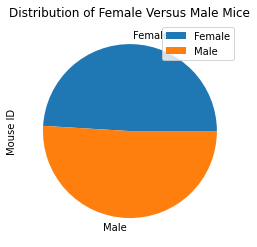

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Count = Pharma_Clean.groupby(['Sex']).count()
Gender_Count2 = Gender_Count[["Mouse ID"]].copy()

plot = Gender_Count2.plot.pie(subplots=True)
plt.title("Distribution of Female Versus Male Mice")

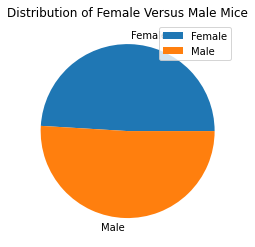

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Female_Count = Pharma_Clean[Pharma_Clean["Sex"]!= "Female"].count()
Female_Count2 = Female_Count[["Mouse ID"]].copy()
Female_Count2

Male_Count = Pharma_Clean[Pharma_Clean["Sex"]!= "Male"].count()
Male_Count2 = Male_Count[["Mouse ID"]].copy()
Male_Count2

Gender_Count = [922,958]
Genders = ["Female", "Male"]
colors = ["LightGreen","LightBlue"]

fig, ax = plt.subplots()

ax.pie(Gender_Count,labels=Genders)
plt.legend(Genders, loc="best")
plt.title("Distribution of Female Versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Mouse_Volume3 = Pharma_Clean.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].max()
Mouse_Volume3.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Mouse_Volume4 = Pharma_Clean.merge(Mouse_Volume3, on=["Mouse ID","Timepoint"])
Mouse_Volume4


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
Regimes_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Summary = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in Regimes_list:
    Tumor_Vol_Final = Mouse_Volume4.loc[Mouse_Volume4["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    Tumor_Vol_Summary.append(Tumor_Vol_Final)    
    
    # Determine outliers using upper and lower bounds
    quartile = Tumor_Vol_Final.quantile([.25,.5,.75])
    lowquart = quartile[.25]
    uppquart = quartile[.75]
    iqr = uppquart-lowquart
    lower_bound = lowquart - (1.5*iqr)
    upper_bound = uppquart + (1.5*iqr)   
    outliers = Tumor_Vol_Final.loc[(Tumor_Vol_Final < lower_bound) | (Tumor_Vol_Final >upper_bound)]
    print(f"{drug} Outliers: {outliers}")
    

Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Volume (Mmm3)')

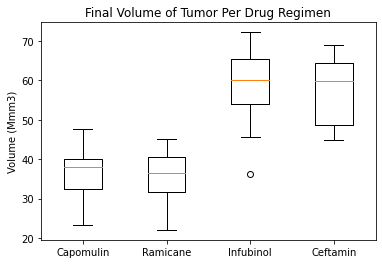

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(Tumor_Vol_Summary, labels = Regimes_list)
plt.title("Final Volume of Tumor Per Drug Regimen")
plt.ylabel("Volume (Mmm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Size of Tumor for a mouse treated with Capomulin over Time')

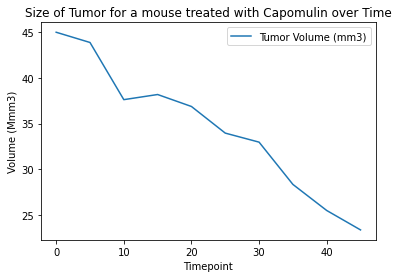

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_Mice = Pharma_Clean.loc[Pharma_Clean["Mouse ID"] == "s185"]
Capomulin_Mice
Capomulin_Mice.set_index('Timepoint').plot(y='Tumor Volume (mm3)')
plt.ylabel("Volume (Mmm3)")
plt.title("Size of Tumor for a mouse treated with Capomulin over Time")

Text(0.5, 1.0, 'ave tumor vol vs. mouse weight for the Capomulin regimen')

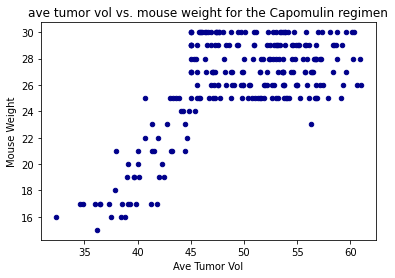

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap_Study = Pharma_Clean.loc[Pharma_Clean["Drug Regimen"] == "Capomulin"]
Cap_Study

Ave_Vol_group = Pharma_Clean.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
Ave_Vol_group
Ave_Weight_group = Pharma_Clean.groupby(['Mouse ID'])['Weight (g)'].mean()
Ave_Weight_group

Ave_Weight_Vol = pd.DataFrame(
    {'Ave Tumor Vol': Ave_Vol_group,
     'Mouse Weight': Ave_Weight_group,
    })
Ave_Weight_Vol

Ave_Weight_Vol.plot.scatter(x='Ave Tumor Vol',
                      y='Mouse Weight',
                      c='DarkBlue')

plt.title("ave tumor vol vs. mouse weight for the Capomulin regimen")

## Correlation and Regression

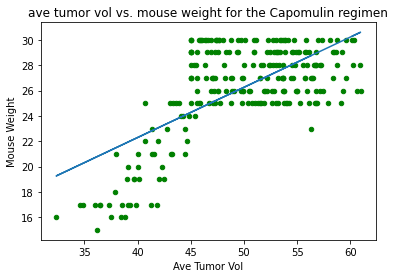

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis_value = Ave_Weight_Vol["Ave Tumor Vol"]
y_axis_value = Ave_Weight_Vol["Mouse Weight"]

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

Ave_Weight_Vol.plot.scatter(x='Ave Tumor Vol',
                      y='Mouse Weight',
                      c='green')

plt.title("ave tumor vol vs. mouse weight for the Capomulin regimen")

plt.plot(x_axis_value, m*x_axis_value + b)

